#Monte Carlo Simulation

-  Geometric Brownian Motion

Assuming the stock under consideration follows lognormal distribution, that is <br>
> $ln\frac{S_T}{S_0} = \phi((\mu - \frac{1}{2}\sigma^2)T, \sigma \sqrt{T})$

> $S_T = S_0 \exp{(u-\frac{1}{2}\sigma^2)T + \sigma \sqrt{T} \epsilon}$


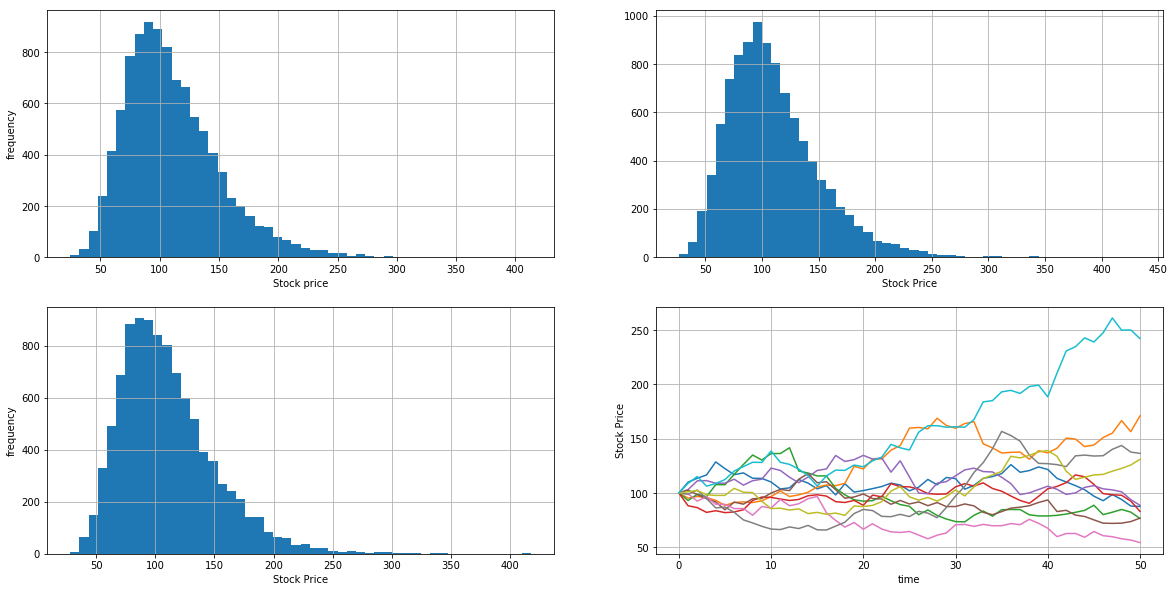

In [21]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

%matplotlib inline

S0 = 100 # initial value
u = 0.05 # constant short rate
sigma = 0.25 # constant volatility
T = 2.0 # in years
I = 10000 # number of random draws

ST1 = S0 * np.exp((u - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

ST2 = S0 * npr.lognormal((u - 0.5 * sigma ** 2) * T, sigma * np.sqrt(T), size=I)

fig, ax = plt.subplots(2, 2, figsize=[20, 10])

plt.subplot(221)
plt.hist(ST1, bins=50)
plt.xlabel('Stock price')
plt.ylabel('frequency')
plt.grid(True)

plt.subplot(222)
plt.hist(ST2, bins=50)
plt.xlabel('Stock Price')
plt.grid(True)

M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0

for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(I))
    
plt.subplot(223)
plt.hist(S[-1], bins=50)
plt.xlabel('Stock Price')
plt.ylabel('frequency')
plt.grid(True)

plt.subplot(224)
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('Stock Price')
plt.grid(True)


-  Square-root diffusion

Square-root diffusion are useful in simulation mean-reverting processes, such as short rates or volatility processes.<br>

> $dx_t=\kappa(\theta-x_t)dt + \sigma\sqrt{x_t}dZ_t$

Under Euler discretization scheme, where normal distribution is used to approximate $x_t$:<br>

> $\tilde{x}_t = \tilde{x}_s + \kappa(\theta - \tilde{x}_s^+)\Delta t + \sigma\sqrt{\tilde{x}_s^+}\sqrt{\Delta t} z_t$ <br>
> $x_t = \tilde{x}_t^+$

Note in this case Euler discretization may create a bias.

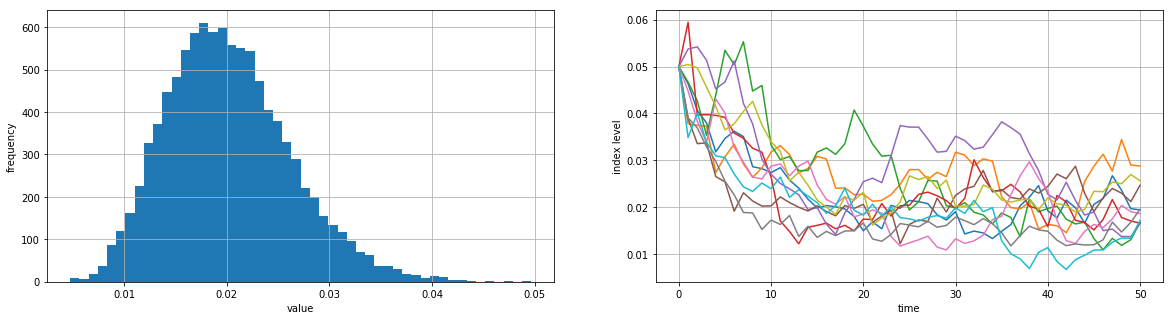

In [26]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
            + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
            + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)
            * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

plt.subplots(1, 2, figsize=[20, 5])

plt.subplot(121)
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

plt.subplot(122)
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

-  Stochastic volatility <br>
Heston stochastic volatility <br>
> $dS_t = rS_t dt + \sqrt{v_t}S_tdZ_t^1$ <br>
> $dv_t = \kappa_v(\theta_v-v_t)dt + \sigma_v \sqrt{v_t}dZ^2_t$ <br>
> $dZ_t^1dZ_t^2 = \rho$

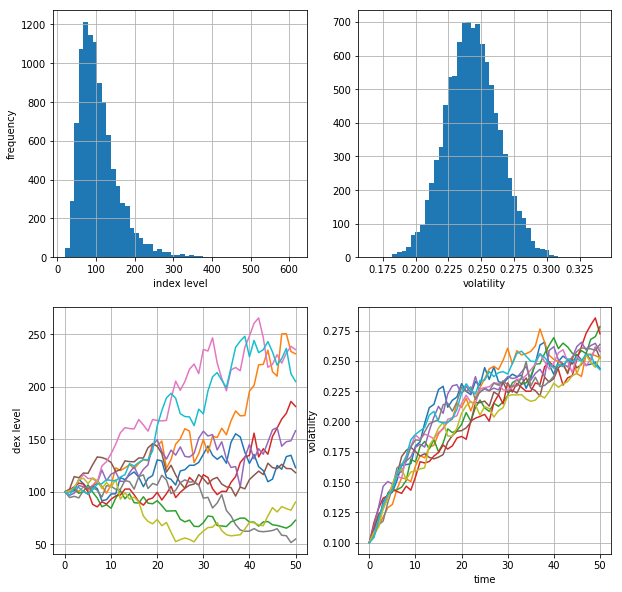

In [34]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))


dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
            + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)
            * ran[1])
v = np.maximum(vh, 0)

S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt 
            + np.sqrt(v[t]) * ran[0] * np.sqrt(dt))
    
plt.subplots(2, 2, figsize=(10, 10))
plt.subplot(221)
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

plt.subplot(222)
plt.hist(v[-1], bins=50)
plt.xlabel('volatility')
plt.grid(True)

plt.subplot(223)
plt.plot(S[:, :10], lw=1.5)
plt.ylabel('dex level')
plt.grid(True)

plt.subplot(224)  
plt.plot(v[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('volatility')
plt.grid(True)